'''
Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. 
Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale
permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

1) Quels sont les pays avec un fort potentiel de clients pour nos services ?
2) Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
3) Dans quels pays l'entreprise doit-elle opérer en priorité ?

Pour la pré-analyse, pourrais-tu :

Q1) Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)

Q2) Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

Q3) Sélectionner les informations qui semblent pertinentes pour répondre à la problématique, 
(quelles sont les colonnes contenant des informations qui peuvent être utiles 
 pour répondre à la problématique de l’entreprise ?)

Q4) Déterminer des ordres de grandeurs des indicateurs statistiques classiques 
pour les différentes zones géographiqueset pays du monde 
(moyenne/médiane/écart-type par pays et par continent ou bloc géographique)'''


# 1.Preliminary
    
    
    

## 1.1 Import



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1.2 Cleaning data

In [2]:
Ed_Stats_Country = pd.read_csv('Source/EdStatsCountry.csv',sep=';')
Ed_Stats_CountrySeries = pd.read_csv('Source/EdStatsCountry-Series.csv',sep=';')
Ed_Stats_Data = pd.read_csv('Source/EdStatsData2.csv',sep=';')
Ed_Stats_Foot_Note = pd.read_csv('Source/EdStatsFootNote.csv',sep=';')
EdSeries = pd.read_csv('Source/EdStatsSeries.csv',sep=';')

C:\Users\Dragomir\AppData\Local\Temp\ipykernel_20276\1413904616.py:3: DtypeWarning: Columns (4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  Ed_Stats_Data = pd.read_csv('Source/EdStatsData2.csv',sep=';')


In [62]:
country = Ed_Stats_Country

country.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
country.loc[country['Special Notes'].isna(),'Special Notes'] = 'non renseigne'
country.isna().mean()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.000000
Region                                               0.427386
Income Group                                         0.427386
WB-2 code                                            0.315353
National accounts base year                          0.464730
National accounts reference year                     0.892116
SNA price valuation                                  0.497925
Lending category                                     0.659751
Other groups                                         0.842324
System of National Accounts                          0.423237
Alternat

In [64]:
filtre_country = country.loc[:,['Short Name','Income Group','Region']]
print(country['Income Group'].unique())

[nan 'Upper middle income' 'High income: nonOECD' 'Lower middle income'
 'High income: OECD' 'Low income']


In [65]:
filtre_country.loc[filtre_country['Income Group'].isna(),'Income Group'] = 'non_renseigne'

income_group = filtre_country['Income Group'].unique()

print(income_group)

print(filtre_country['Income Group'].count())


['non_renseigne' 'Upper middle income' 'High income: nonOECD'
 'Lower middle income' 'High income: OECD' 'Low income']
241


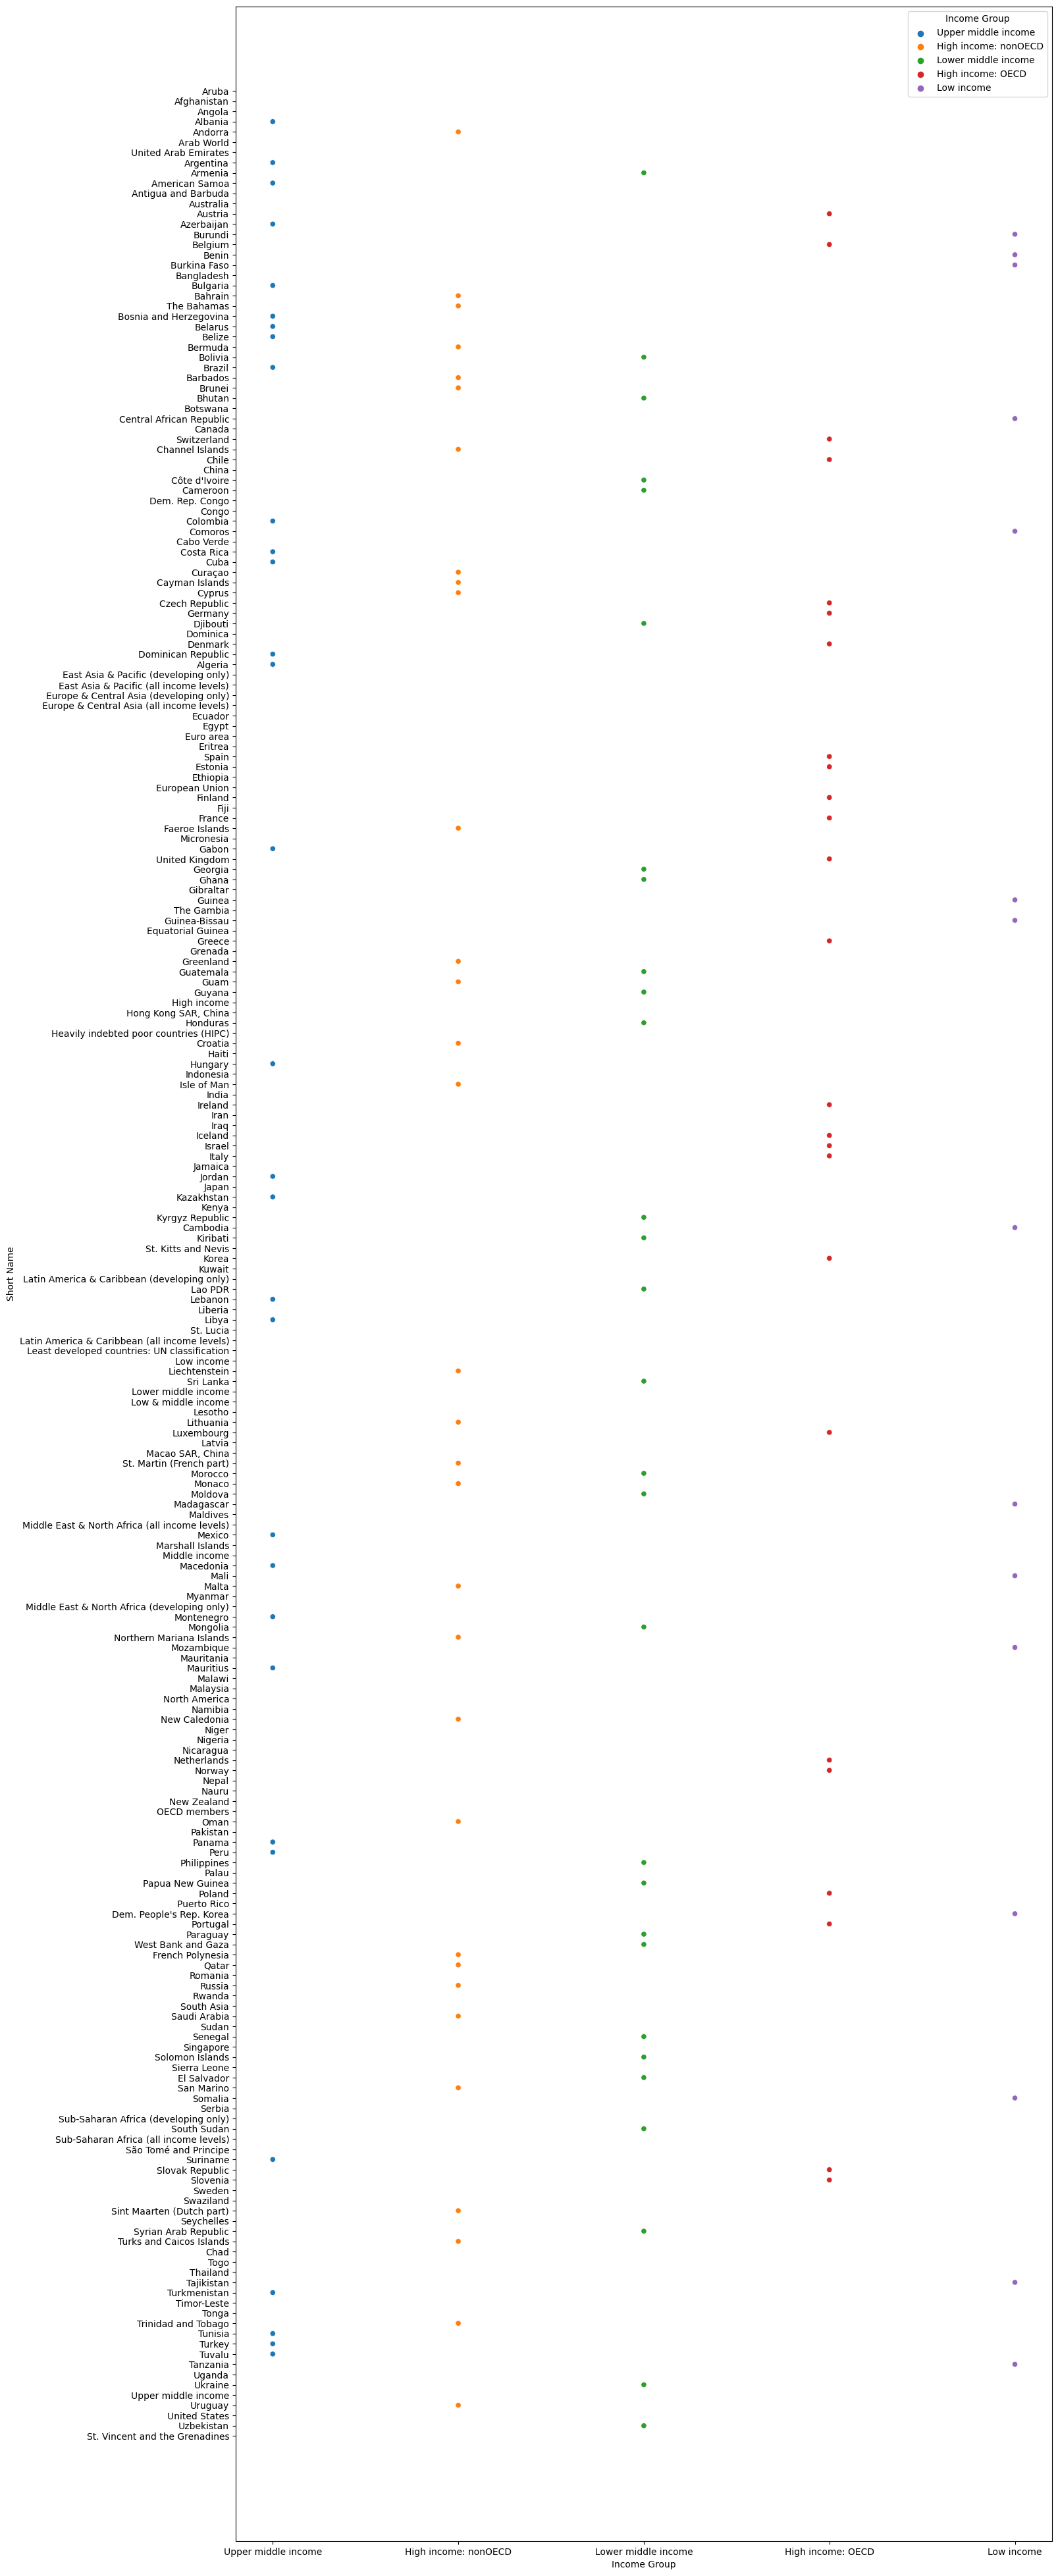

In [25]:
Coun = country.iloc[:230]
Coun.head(8)
f, ax = plt.subplots(figsize=(16, 50))
flr = sns.scatterplot(data = Coun, x = 'Income Group',y = 'Short Name', hue = 'Income Group',ax = ax)

[nan 'Upper middle income' 'High income: nonOECD' 'Lower middle income'
 'High income: OECD' 'Low income']


<AxesSubplot:>

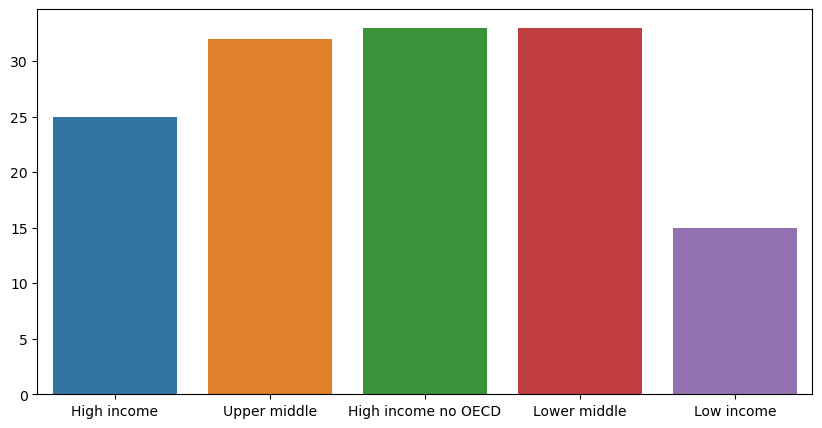

In [26]:
print(country['Income Group'].unique())

High_income = country.loc[ (country['Income Group'] == 'High income: OECD'),['Short Name','Income Group']].count()

Upper_middle_inc = country.loc[ (country['Income Group'] == 'Upper middle income'),['Short Name','Income Group']].count()

High_income_no_OECD = country.loc[ (country['Income Group'] == 'High income: nonOECD'),['Short Name','Income Group']].count()

Lower_middle_income = country.loc[ (country['Income Group'] == 'Lower middle income'),['Short Name','Income Group']].count()

Low_income = country.loc[ (country['Income Group'] == 'Low income'),['Short Name','Income Group']].count()

Country_sort_income_group = country.sort_values('Income Group')

Country_sort_income_group.head(200)

df = pd.DataFrame({'High income' : High_income, 'Upper middle' : Upper_middle_inc, 'High income no OECD' : High_income_no_OECD, 'Lower middle' : Lower_middle_income,'Low income' : Low_income})
df.head()
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data = df ,ax = ax)

In [27]:
#Liste des Income Group par pays 
print(country['Income Group'].unique())

High_income = country.loc[ (country['Income Group'] == 'High income: OECD'),['Short Name','Income Group']]

Upper_middle_inc = country.loc[ (country['Income Group'] == 'Upper middle income'),['Short Name','Income Group']]

High_income_no_OECD = country.loc[ (country['Income Group'] == 'High income: nonOECD'),['Short Name','Income Group']]

Lower_middle_income = country.loc[ (country['Income Group'] == 'Lower middle income'),['Short Name','Income Group']]

Low_income = country.loc[ (country['Income Group'] == 'Low income'),['Short Name','Income Group']]



[nan 'Upper middle income' 'High income: nonOECD' 'Lower middle income'
 'High income: OECD' 'Low income']


In [29]:
# Retire les données manquantes
Country_Income = Country_sort_income_group[['Short Name','Region','Income Group']].copy()
#Remplace les valuers manquantes
Country_Income.loc[Country_Income['Income Group'].isna(),'Income Group']  = 'no value'

poor = Country_Income['Income Group'].isin(['Low income','no value'])
# Enlève les pays avec un resultat d'income group : low income
Country_data = Country_Income.loc[ ~poor,:]

Country_Income_Group = Country_data['Short Name']
print('Les pays ayant un income group de -> High income à Upper middle income \n',Country_Income_Group)

Les pays ayant un income group de -> High income à Upper middle income 
 66            Estonia
69            Finland
51            Germany
50     Czech Republic
71             France
            ...      
149        Montenegro
46               Cuba
45         Costa Rica
42           Colombia
3             Albania
Name: Short Name, Length: 123, dtype: object


In [30]:
country_series = Ed_Stats_CountrySeries
valeur_manquante = country_series.isna().sum()
valeur_manquante.mean()
country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


In [32]:
ed_data = Ed_Stats_Data
uni = ed_data['Indicator Name'].unique()
ed_data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2011,2012,2013,2014,2015,2016,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
ed_data.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2011              0.779343
2012              0.778015
2013              0.793313
2014              0.833910
2015              0.796831
2016              0.978485
2017              0.999916
Unnamed: 11       1.000000
Unnamed: 12       1.000000
Unnamed: 13       1.000000
Unnamed: 14       1.000000
Unnamed: 15       1.000000
Unnamed: 16       1.000000
Unnamed: 17       1.000000
Unnamed: 18       1.000000
Unnamed: 19       1.000000
Unnamed: 20       1.000000
Unnamed: 21       1.000000
Unnamed: 22       1.000000
Unnamed: 23       1.000000
Unnamed: 24       1.000000
Unnamed: 25       1.000000
Unnamed: 26       1.000000
Unnamed: 27       1.000000
Unnamed: 28       1.000000
dtype: float64

#Indicateur 

Enrolment in secondary education, both sexes (number)
Enrolment in upper secondary education, both sexes (number)
Enrolment in tertiary education, all programmes, both sexes (number)
Gross enrolment ratio, secondary, both sexes (%)
GDP at market prices (constant 2005 US$)
GDP at market prices (current US$)
GDP per capita (constant 2005 US$)
GDP per capita (current US$)  Ok
GDP per capita, PPP (constant 2011 international $)
GDP per capita, PPP (current international $)
GDP, PPP (constant 2011 international $)
GNI per capita, PPP (current international $) Ok
GNI (current US$) Ok
Internet users (per 100 people) Ok
Illiterate population, 25-64 years, both sexes (number) Ok
Lower secondary completion rate, both sexes (%) 
Out-of-school children of primary school age, both sexes (number)
Personal computers (per 100 people) Pas besoin 
Percentage of graduates from tertiary education graduating from Engineering, Manufacturing and Construction programmes, both sexes (%)
Percentage of graduates from tertiary education graduating from Education programmes, both sexes (%)
Percentage of repeaters in primary education, all grades, gender parity index (GPI)
Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Health and Welfare programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Humanities and Arts programmes, both sexes (%)
Percentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%)
Percentage of students in tertiary education enrolled in Science programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Services programmes, both sexes (%)
Percentage of students in tertiary education enrolled in Social Sciences, Business and Law programmes, both sexes (%)
Population growth (annual %) Ok
Population, ages 15-64 (% of total)
Population, ages 15-64, female
Population, ages 15-64, male
Population, ages 15-64, total OK
Population of the official age for tertiary education, both sexes (number) Ok
Net enrolment rate, upper secondary, both sexes (%)
Net enrolment rate, secondary, both sexes (%)
Pupil-teacher ratio in primary education (headcount basis) Etudier 
Rate of out-of-school children of primary school age, both sexes (%)
School life expectancy, primary and secondary, both sexes (years)
School life expectancy, primary to tertiary, both sexes (years) 
School life expectancy, tertiary, both sexes (years) 
Unemployment, total (% of total labor force) L'analyser 
Youth illiterate population, 15-24 years, both sexes (number) Ok
Country Name	Country Code	Indicator Name	Indicator Code

In [94]:
filt_population_age_15_64 = ed_data['2016']

filt_GDP = ed_data['Indicator Name'] == 'GDP per capita (current US$)'

filt_GNI = ed_data['Indicator Name'] == 'GNI (current US$)'

filt_internet_data = ed_data['Indicator Name'] == 'Internet users (per 100 people)'

filt_ed_data_indicator = ['Country Name','Indicator Name','2013','2014','2015','2016','2017']

filt_Total_Population = 'Population, ages 15-64, total'

filt_upper_secondary = ed_data['Indicator Name'] == 'Net enrolment rate, upper secondary, both sexes (%)'

filt_secondary = ed_data['Indicator Name'] == 'Net enrolment rate, secondary, both sexes (%)'

filt_illerate_25_64 = ed_data['Indicator Name'] == 'Illiterate population, 25-64 years, both sexes (number)'

filt_enrolment_secondary = ed_data['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)'

filt_enrolment_upper_secondary = ed_data['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)'

filt_unemployment = ed_data['Indicator Name'] == 'Unemployment, total (% of total labor force)'

popul_sup_1M = ed_data.loc[ed_data['Indicator Name'] == filt_Total_Population,filt_ed_data_indicator]

# Affecte à la valeur NaN la valeur 
popul_sup_1M.loc[popul_sup_1M['2016'].isna(),:] = 0

# Covertie le type des données en int
popul_sup_1M['2016'] = popul_sup_1M['2016'].astype('int64')

popul_sup_1M = popul_sup_1M.loc[popul_sup_1M['2016'] > 1000000, :]

filter_country = popul_sup_1M['Country Name'].values

# Tri les pays dont l'income group n'appartient pas à catégorie low income et dont la population est > à 1 M d'hab
i = [i for i in Country_Income_Group for j in filter_country if i == j]

print(f'il y a {len(filter_country)} pays dont la population est superieur à 1 M') 

i = np.array(i)

ed_data['Country Name']= ed_data['Country Name'].astype(str)

# Filtre les pays avec les Income_Group suivant ['Upper middle income' 'High income: nonOECD' 'Lower middle income''High income: OECD'] et la population sup à 1 M d'habitant  
mask = ed_data['Country Name'].isin(i)

ed_data = ed_data.loc[mask]

indicator_GDP_per_capita = ed_data.loc[filt_GDP,filt_ed_data_indicator]

indicator_internet = ed_data.loc[filt_internet_data,filt_ed_data_indicator]

indicator_GNI_per_capita = ed_data.loc[filt_GNI,filt_ed_data_indicator]

indicator_percent_net_upper_secondary = ed_data.loc[filt_upper_secondary, filt_ed_data_indicator]

indicator_percent_net_upper_secondary = ed_data.loc[filt_secondary,filt_ed_data_indicator]

indicator_illerate_25_64 = ed_data.loc[filt_illerate_25_64,filt_ed_data_indicator]

indicator_enrolment_secondary = ed_data.loc[filt_enrolment_secondary,filt_ed_data_indicator]

indicator_enrolment_upper_secondary = ed_data.loc[filt_enrolment_upper_secondary,filt_ed_data_indicator]

indicator_unemployment = ed_data.loc[filt_unemployment,filt_ed_data_indicator]



il y a 75 pays dont la population est superieur à 1 M


C:\Users\Dragomir\AppData\Local\Temp\ipykernel_20276\447605240.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_data['Country Name']= ed_data['Country Name'].astype(str)


In [134]:
data = ed_data['Indicator Name'].isin(['GDP per capita (current US$)','GNI per capita, PPP (current international $)','Internet users (per 100 people)','Population, ages 15-64, total','Net enrolment rate, upper secondary, both sexes (%)','Net enrolment rate, secondary, both sexes (%)','Illiterate population, 25-64 years, both sexes (number)','Enrolment in secondary education, both sexes (number)','Enrolment in upper secondary education, both sexes (number)','Unemployment, total (% of total labor force)'])
data = ed_data.loc[data,filt_ed_data_indicator]
print(data.isna().mean())


Country Name      0.000000
Indicator Name    0.000000
2013              0.185333
2014              0.216000
2015              0.358667
2016              0.497333
2017              1.000000
dtype: float64


In [135]:
data = data.pivot_table(index = 'Country Name',columns = 'Indicator Name', values = '2014').reset_index()


In [137]:
data.loc[data['Enrolment in secondary education, both sexes (number)'].isnull(),'Enrolment in secondary education, both sexes (number)'] = 0
data['Enrolment in secondary education, both sexes (number)'] = data['Enrolment in secondary education, both sexes (number)'].astype(int)

data.loc[data['Enrolment in upper secondary education, both sexes (number)'].isnull(),'Enrolment in upper secondary education, both sexes (number)'] = 0
data['Enrolment in upper secondary education, both sexes (number)'] = data['Enrolment in upper secondary education, both sexes (number)'].astype(int)

data.loc[data['GDP per capita (current US$)'].isnull(),'GDP per capita (current US$)'] = 0
data['GDP per capita (current US$)'] = data['GDP per capita (current US$)'].astype(int)

data.loc[data['Internet users (per 100 people)'].isnull(),'Internet users (per 100 people)'] = 0
data['Internet users (per 100 people)'] = data['Internet users (per 100 people)'].astype(int)

data

Indicator Name,Country Name,"Enrolment in secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),"GNI per capita, PPP (current international $)","Illiterate population, 25-64 years, both sexes (number)",Internet users (per 100 people),"Net enrolment rate, secondary, both sexes (%)","Net enrolment rate, upper secondary, both sexes (%)","Population, ages 15-64, total","Unemployment, total (% of total labor force)"
0,Albania,333291,151937,4578,11200.0,NaN,60,85.278214,70.286232,1996460.0,17.5
1,Algeria,0,0,5466,13890.0,NaN,29,NaN,NaN,25800849.0,10.6
2,Argentina,4450741,0,12245,19400.0,NaN,64,88.246002,NaN,27440753.0,7.3
3,Armenia,244543,103385,3994,8790.0,NaN,54,NaN,NaN,2017975.0,17.6
4,Austria,697388,363187,51733,49070.0,NaN,80,NaN,NaN,5736127.0,5.6
...,...,...,...,...,...,...,...,...,...,...,...
70,United Kingdom,6556991,4195081,46783,40180.0,NaN,91,98.279984,91.964752,41744392.0,6.1
71,Uruguay,291805,0,16737,20180.0,20061.70608,61,76.348099,NaN,2190338.0,6.5
72,Uzbekistan,4082709,0,2050,5920.0,0.00000,35,92.207382,NaN,20809283.0,8.9
73,West Bank and Gaza,709226,142063,2960,NaN,58245.90109,53,80.124451,60.137569,2429794.0,26.9


<AxesSubplot:ylabel='Indicator Name'>

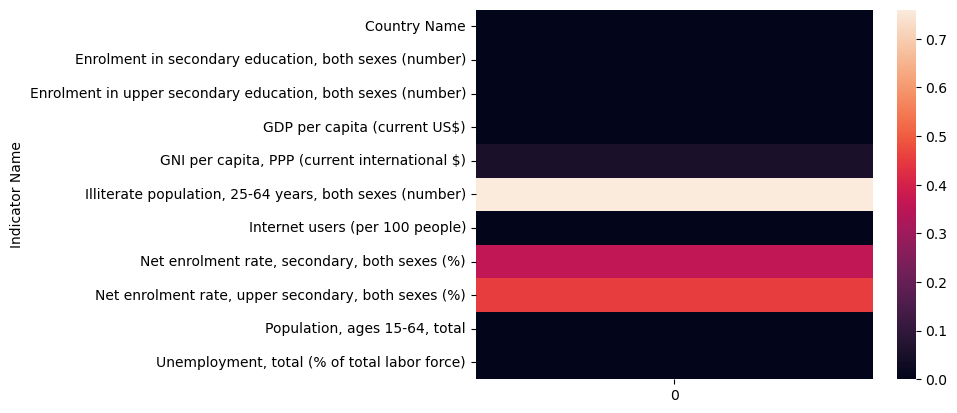

In [138]:
MAP = data.isna().mean()
MAP = pd.DataFrame(data= MAP)
sns.heatmap(MAP)

In [11]:
ed_foot_note = Ed_Stats_Foot_Note
ed_foot_note.head(115)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.
...,...,...,...,...
110,ABW,SE.COM.DURS,YR2010,Country data
111,ABW,SE.COM.DURS,YR2011,Country data
112,ABW,SE.COM.DURS,YR2012,Country data
113,ABW,SE.ENR.PRIM.FM.ZS,YR1999,Country data


In [179]:
edseries = EdSeries
edseries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
coureur = pd.read_csv('C:/Users/Dragomir/Desktop/courseP2.csv',sep=';')
coureur.isnull().sum()
coureur.head(4)

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,779543,40.0
1,2,M,00:32:40,27,779560,34.0
2,3,M,00:33:15,76,779595,44.0
3,4,M,00:33:23,76,779603,46.0


In [14]:
import time
conv = pd.to_datetime(coureur['Temps_secondes'],format = '%H:%M%:%S',errors = 'coerce')
coureur.loc[coureur['Temps_secondes'].duplicated(keep=False),:]


,Position,Sexe,Temps,Dept,Temps_secondes,Age
28,29,M,00:37:07,76,779827,31.0
29,30,M,00:37:07,76,779827,25.0
57,58,M,00:40:41,76,780041,65.0
58,59,M,00:40:41,27,780041,42.0
62,63,M,00:41:13,76,780073,53.0
...,...,...,...,...,...,...
328,329,F,01:06:07,27,781567,20.0
329,330,F,01:06:07,27,781567,28.0
330,331,F,01:06:07,27,781567,29.0
337,338,M,01:09:31,27,781771,24.0
